# Homework 03


## Part 1 - Questions

### Question 1: 

What were the top three leading causes of death across different racial/ethnic groups in NYC in 2010?
* Who (population): NYC residents
* What (subject, discipline): Leading causes of death grouped by race/ethnicity
* Where (location): NYC boroughs (e.g., Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* When (snapshot, longitudinal): Snapshot for the year 2010
* How much data do you need to do the analysis/work: Death records for 2010 that include cause of death, race/ethnicity, and total counts for accurate rankings

### Question N: 

How has the death count for malignant neoplasms (cancer) changed over the years for different genders?
* Who (population): NYC residents
* What (subject, discipline): death counts for malignant neoplasms (cancer) analyzed by gender
* Where (location): Entire NYC
* When (snapshot, longitudinal): Longitudinal analysis over a multi-year period (e.g., 2007–2014)
* How much data do you need to do the analysis/work: Death count by gender and year for malignant neoplasms

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

NYC Open Data collects data on leading causes of deaths through their NYC Leading Causes of Death dataset

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: New York City Leading Causes of Death
2. Link to Data: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data
3. Source / Origin: 
	* Author or Creator: Department of Health and Mental Hygiene (DOHMH)
	* Publication Date: November 20, 2013
	* Publisher: NYC OpenData
	* Version or Data Accessed: February 16, 2025
4. License: Public Domain Dedication and License (PDDL)
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview

* Format: CSV
* Size: 94 KB
* Number of Records: 1,094

### Sample of Data




In [7]:
!pip install matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np


In [9]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
path = "../data/New_York_City_Leading_Causes_of_Death_20250215.csv"
with open(path,'r') as f:
    for index, line in enumerate(f):
        if index==4:
            break
        print(line)

Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate

2007,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,11,.,.

2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,70,.,.

2007,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,213,25,33




### Fields or Column Headers

* Field/Column 1: Race/Ethnicity of descendant  (string) 
* Field/Column 2: Year of death (int)
* Field/Column 3: Leading Cause of Death (string)
* Field/Column 4: Sex of descendant (string)
* Field/Column 5: Deaths - The number of people who died due to cause of death (int)

### **Part 3 - Extract / Transform**

#### **Columns to Be Extracted:**
I will focus on the following columns from the dataset:
- **Year:** Represents the year of the reported deaths
- **Race/Ethnicity:** Specifies the demographic group of the deceased
- **Leading Cause of Death:** The categorized cause of death
- **Sex of Descendant:** Indicates the gender of the deceased
- **Number of Deaths:** Provides the total count of deaths for each category

---

#### **Data Conversion and Cleaning Process:**

1. **Convert Data to Appropriate Python Types:**
   - **Year:** Convert the `Year` column to integers
   - **Number of Deaths:** Ensure this column is numeric and replace missing values with `0`
   - **Categorical Columns (Race/Ethnicity, Leading Cause of Death, and Sex):**
     - Keep these columns as strings

2. **Remove Unnecessary Columns:**
   - Remove **Death Rate** and **Age-Adjusted Death Rate**


In [13]:
data = []
with open(path,'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      data.append(row)

#find index of death rate and age adjusted death rate
death_rate_idx = header.index("Death Rate")
age_adjusted_idx = header.index("Age Adjusted Death Rate")
death_count_idx=header.index("Deaths")

#remove both columns
cleaned_data=[[value for index,value in enumerate(line) if index != death_rate_idx and index != age_adjusted_idx] for line in data]

#iterate through the number of deaths, ensure column is numeric, replace missing values with 0
#ensure year column is int 
for line in cleaned_data:
    try:
        #convert year to int
        line[0]=int(line[0])
        #convert death column to int
        line[death_count_idx]=int(line[death_count_idx])
    except(ValueError,TypeError):
        #replace missing values for the death column with 0
        line[death_count_idx]=0



## Part 4 - Descriptive Statistics

### Analysis on Numeric Data





#### Records, Range

In [15]:
#examine number of records, range / outliers with min and max
death_count_data=[line[death_count_idx] for line in cleaned_data]

num_records=len(death_count_data)
maxVal=max(death_count_data)
minVal=min(death_count_data)
rangeOfVals= maxVal-minVal

print("Death Count Statistics")
print(f"Number of Records: {num_records}")
print(f"Maximum Value: {maxVal}")
print(f"Minimum Value: {minVal}")
print(f"Range of Values: {rangeOfVals}")

Death Count Statistics
Number of Records: 1094
Maximum Value: 7050
Minimum Value: 0
Range of Values: 7050


#### Outliers


In [337]:
cleaned_data=np.array(cleaned_data)
death_count = cleaned_data[:,death_count_idx].astype(int)

#find the iterquartile range
q1=np.percentile(death_count,25)
q3=np.percentile(death_count,75)

interquartile_range =q3-q1
lower_bound=q1-1.5*interquartile_range
upper_bound = q3+1.5*interquartile_range

outliers = [val for val in death_count if val<lower_bound or val>upper_bound]
print(f"Outliers:{outliers}")

Outliers:[1852, 1349, 2034, 1375, 1167, 1749, 1007, 3518, 1080, 1320, 1216, 4085, 1045, 1818, 1082, 2578, 820, 1918, 7050, 1348, 1199, 2269, 1382, 1327, 988, 5168, 1067, 3361, 2722, 1046, 775, 2121, 1230, 3153, 1784, 5351, 6836, 1085, 1154, 3346, 2068, 2077, 2015, 2282, 1326, 1307, 657, 1557, 3142, 1109, 1680, 1097, 1207, 3256, 3132, 4719, 1523, 2275, 4156, 4507, 1418, 3438, 1268, 2725, 1263, 3187, 2595, 707, 1540, 1445, 696, 1532, 2243, 1706, 1840, 885, 659, 1163, 4220, 1592, 1126, 1557, 3366, 1149, 1536, 6297, 3236, 1146, 1316, 1144, 1800, 1868, 1912, 1125, 2445, 1025, 2165, 1195, 1563, 1341, 2140, 3222, 5632, 1464, 1281, 5503, 1201, 2316, 1590, 1246, 1684, 1251, 1473, 1337, 1230, 1230, 2444, 3408, 1330, 1305, 1146, 2535, 5016, 1756, 1069, 1735, 3184, 3371, 1180, 3356, 4495, 1483, 1940, 2194, 1135, 1013, 1768, 4535, 969, 1261, 1193, 3990, 1824, 1057, 1958, 2365, 1354, 2293]


#### Central Tendency

In [17]:
#turn into numpy array
cleaned_data=np.array(cleaned_data)

#extract year, cause, death columns
years = cleaned_data[:,0].astype(int)
leading_cause=cleaned_data[:,1]
death_count = cleaned_data[:,death_count_idx].astype(int)
race_ethnicity =cleaned_data[:,3]
sex=cleaned_data[:,2]

unique_years = np.unique(years)
results=[]
#find the mean deaths each year
for year in unique_years:
    #get the death counts that match the year and leading cause
    deaths = [int(row[death_count_idx]) for row in cleaned_data if int(row[0]) == year]
    #calculate the mean
    mean_death = np.mean(deaths)
    std_deaths = np.std(deaths)
    results.append([year,mean_death,std_deaths])

for result in results:
    print(f"Year: {result[0]}, Mean Deaths in NYC: {result[1]:.2f}")

Year: 2007, Mean Deaths in NYC: 382.95
Year: 2008, Mean Deaths in NYC: 398.07
Year: 2009, Mean Deaths in NYC: 391.26
Year: 2010, Mean Deaths in NYC: 380.47
Year: 2011, Mean Deaths in NYC: 373.94
Year: 2012, Mean Deaths in NYC: 391.19
Year: 2013, Mean Deaths in NYC: 401.41
Year: 2014, Mean Deaths in NYC: 389.75


#### Dispersion

In [19]:
for result in results:
    print(f"Year: {result[0]}, Std Dev of Deaths in NYC: {result[2]:.2f}")

Year: 2007, Std Dev of Deaths in NYC: 929.75
Year: 2008, Std Dev of Deaths in NYC: 925.15
Year: 2009, Std Dev of Deaths in NYC: 881.59
Year: 2010, Std Dev of Deaths in NYC: 814.11
Year: 2011, Std Dev of Deaths in NYC: 785.61
Year: 2012, Std Dev of Deaths in NYC: 785.43
Year: 2013, Std Dev of Deaths in NYC: 776.02
Year: 2014, Std Dev of Deaths in NYC: 762.31


In [344]:
# TODO: copy and paste your results here

###  Analysis on Categorical Data

#### Unique Values and Frequency

In [21]:
unique_years,year_counts = np.unique(years,return_counts=True)
unique_leading_causes,cause_counts = np.unique(leading_cause,return_counts=True)
unique_race_ethnicity, race_ethnicity_counts = np.unique(race_ethnicity,return_counts=True)
unique_sex,sex_counts =np.unique(sex,return_counts=True)

print("Years:")
for value, count in zip(unique_years, year_counts):
    print(f"Year: {value}, Frequency: {count}")

print()
print("Leading Causes:")
for value, count in zip(unique_leading_causes, cause_counts):
    print(f"Cause: {value}, Frequency: {count}")

print()
print("Sex:")
for value, count in zip(unique_sex, sex_counts):
    print(f"Sex: {value}, Frequency: {count}")
print()
print("Race Ethnicity:")
for value, count in zip(unique_race_ethnicity, race_ethnicity_counts):
    print(f"Race/Ethnicity : {value}, Frequency: {count}")

Years:
Year: 2007, Frequency: 141
Year: 2008, Frequency: 136
Year: 2009, Frequency: 135
Year: 2010, Frequency: 138
Year: 2011, Frequency: 141
Year: 2012, Frequency: 134
Year: 2013, Frequency: 133
Year: 2014, Frequency: 136

Leading Causes:
Cause: Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86), Frequency: 80
Cause: All Other Causes, Frequency: 96
Cause: Alzheimer's Disease (G30), Frequency: 32
Cause: Aortic Aneurysm and Dissection (I71), Frequency: 3
Cause: Assault (Homicide: Y87.1, X85-Y09), Frequency: 20
Cause: Atherosclerosis (I70), Frequency: 3
Cause: Cerebrovascular Disease (Stroke: I60-I69), Frequency: 90
Cause: Certain Conditions originating in the Perinatal Period (P00-P96), Frequency: 26
Cause: Chronic Liver Disease and Cirrhosis (K70, K73), Frequency: 29
Cause: Chronic Lower Respiratory Diseases (J40-J47), Frequency: 88
Cause: Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99), Frequency: 8
Cause: Diabetes Mellitus (E10-E14), Freq

## Part 5 - Visualizations



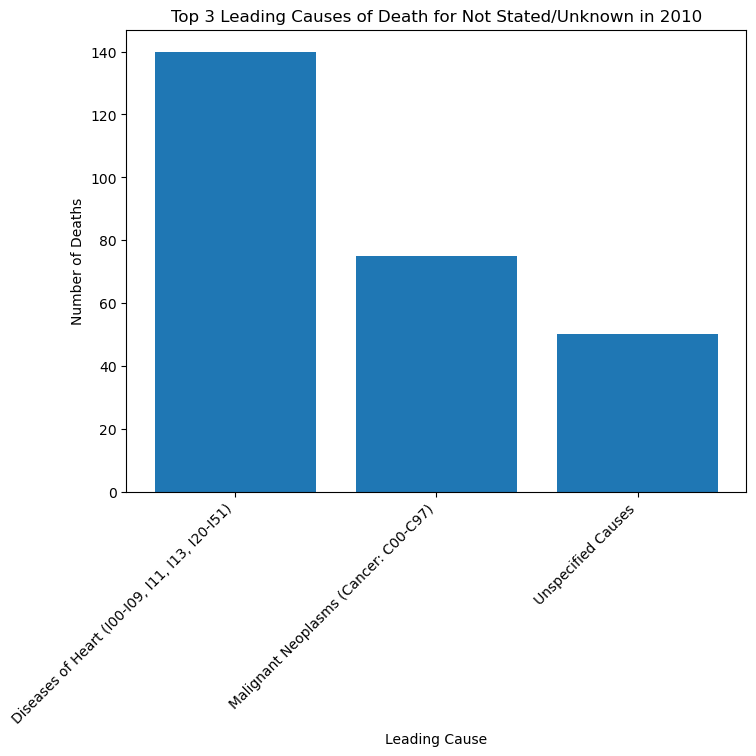

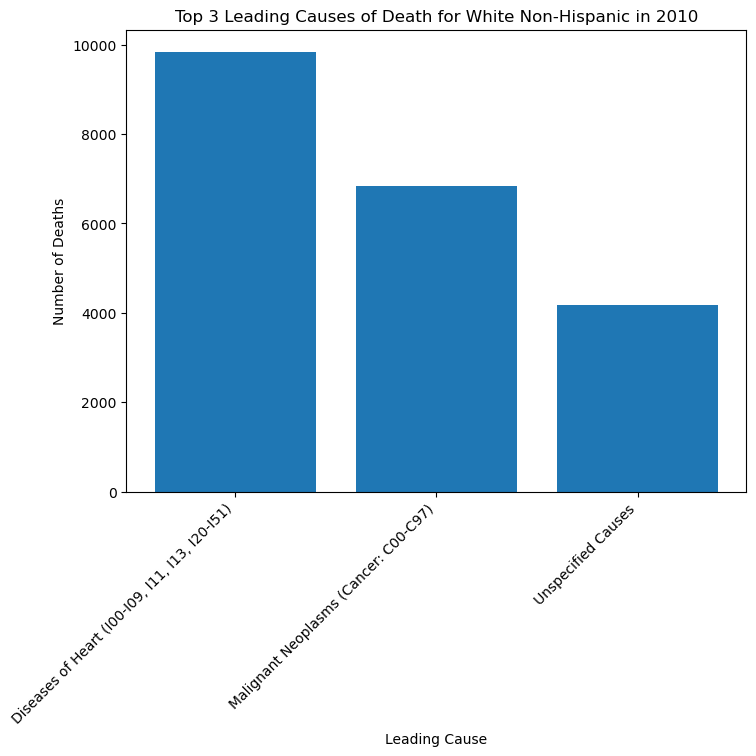

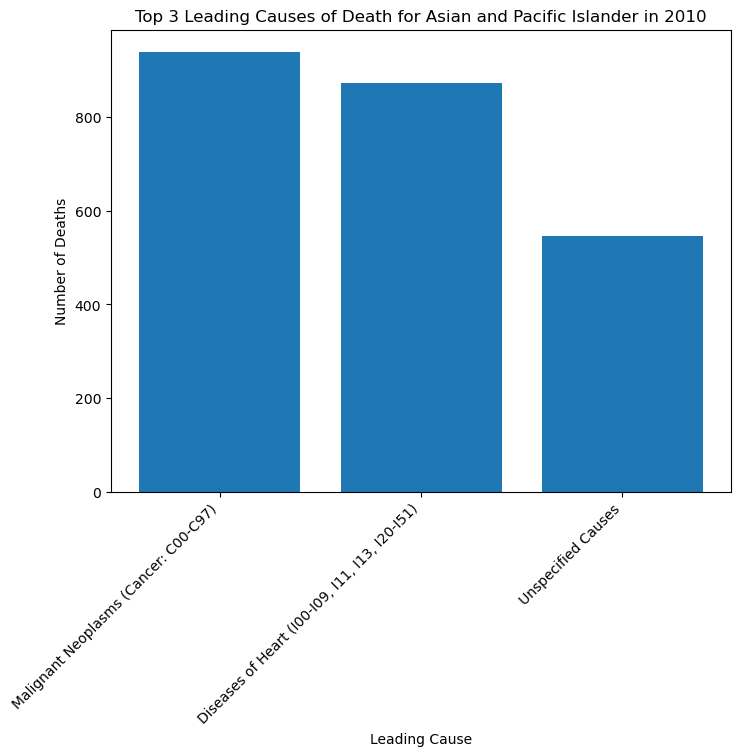

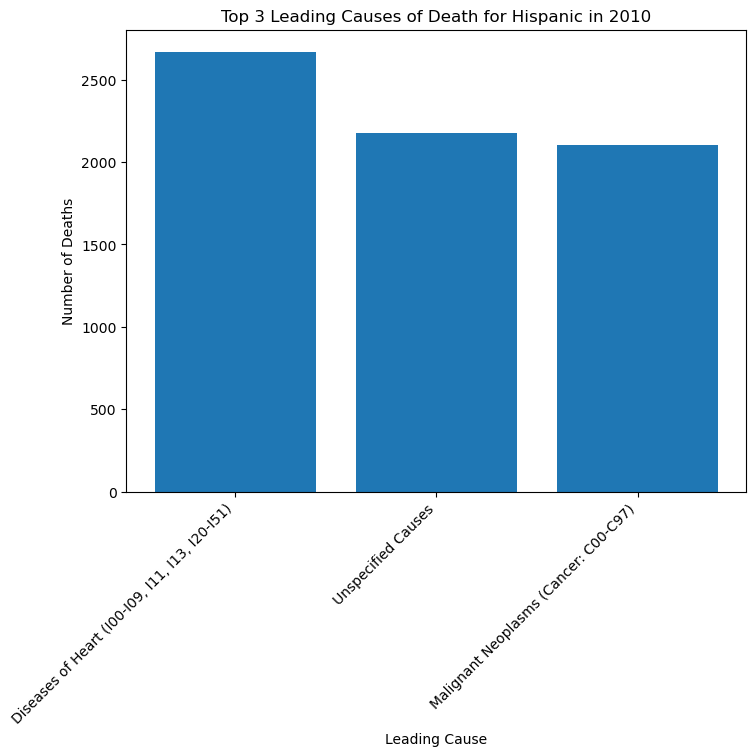

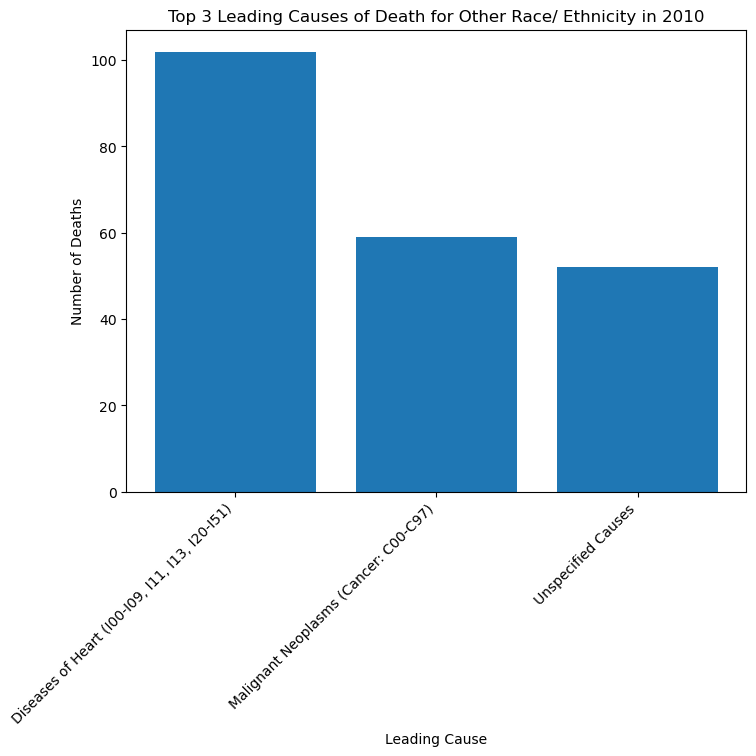

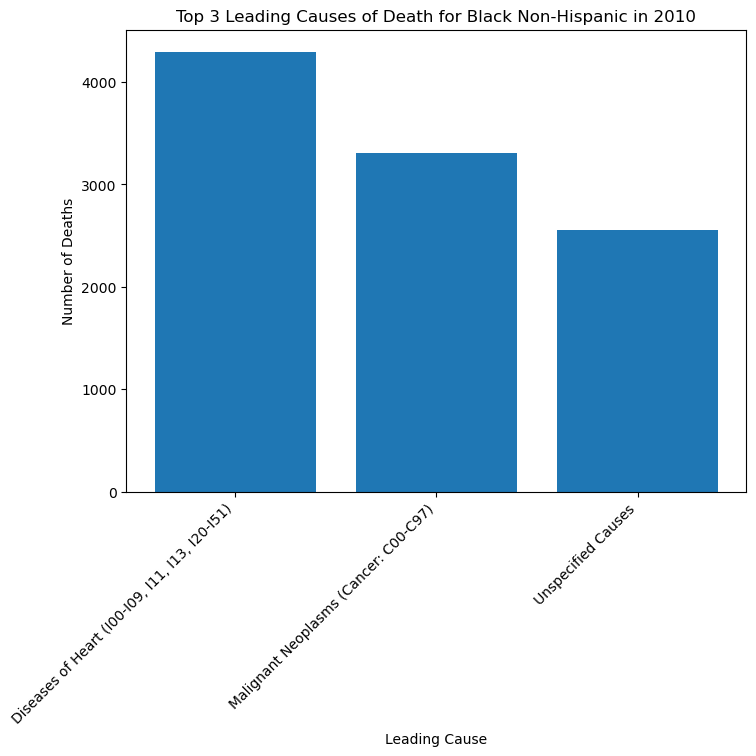

In [23]:
#What were the top three leading causes of death across different racial/ethnic groups in NYC in 2010?
#get the data for 2010 

data_2010 = [line for line in cleaned_data if int(line[0])==2010]
unique_race_ethnicity

#for each ethnicity, count the deaths for each leading cause 
#dict to store results
race_cause_deaths={}

# count deaths for each leading cause by race/ethnicity
for line in data_2010:
    race_ethnicity = line[3]
    cause = line[1]
    deaths = int(line[4])
    if race_ethnicity not in race_cause_deaths:
        race_cause_deaths[race_ethnicity] = {}
    if cause not in race_cause_deaths[race_ethnicity]:
        race_cause_deaths[race_ethnicity][cause] = 0
    race_cause_deaths[race_ethnicity][cause] += deaths


#store top 3 causes for each race/ethnicity
top_3_causes = {}

#sort the death count for each race/ethnicity
for race,causes in race_cause_deaths.items():
    sorted_causes = sorted(causes.items(),key=lambda x: x[1],reverse=True)
    top_3_causes[race]=sorted_causes[:3]

top_3_causes

# replaced 'All Other Causes' with a clearer label since the label can be misleading because it is an actual category in the dataset
# It includes all causes that are not explicitly specified elsewhere in the dataset, so it was renamed 'Unspecified Causes' to avoid confusion
for race, causes in top_3_causes.items():
    #replaced "All Other Causes label"
    causes_names = [cause if cause!="All Other Causes" else "Unspecified Causes" for cause,deaths in causes]
    deaths_values = [deaths for cause, deaths in causes]

    plt.figure(figsize=(8, 6))
    plt.bar(causes_names, deaths_values)
    plt.title(f"Top 3 Leading Causes of Death for {race} in 2010")
    plt.xlabel("Leading Cause")
    plt.ylabel("Number of Deaths")
    plt.xticks(rotation=45, ha="right")


### Visualization for Question 1: Top 3 Leading Causes of Death Across Different Racial/Ethnic Groups in NYC in 2010

- **Visualization Type**: Bar Chart
- **Description**: 
  - A bar chart was used to present the top three leading causes of death for each racial/ethnic group in NYC in 2010
  - The x-axis represents the leading causes of death, while the y-axis represents the number of deaths
  - Each chart focuses on a specific racial/ethnic group


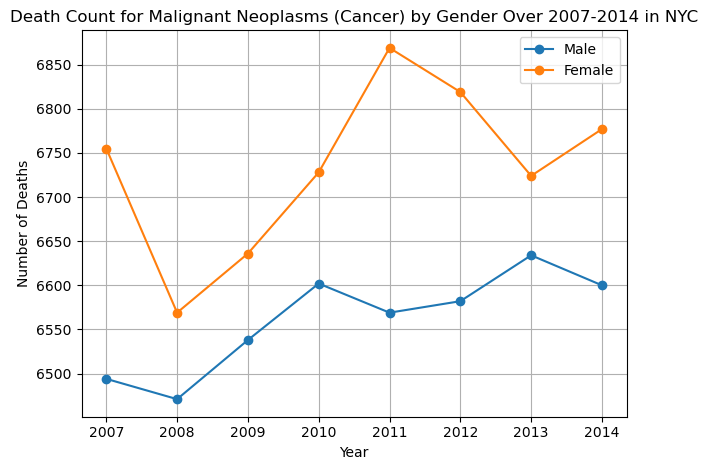

In [25]:
#How has the death count for malignant neoplasms (cancer) changed over the years for different genders?

#filter cancer data
cancer_data = [line for line in cleaned_data if "Malignant Neoplasms" in line[1]]
#results dictionary
gender_cancer_deaths = {}

for year in unique_years:
    #filter data for current year
    year_data=[line for line in cancer_data if int(line[0])==year]
    for line in year_data:
        #extract gender
        gender=line[2]
        death_count=int(line[4])
        
        if (year, gender) not in gender_cancer_deaths:
            gender_cancer_deaths[(year, gender)] = 0
        gender_cancer_deaths[(year, gender)] += death_count

male_deaths = [gender_cancer_deaths.get((year, "M"), 0) for year in unique_years]
female_deaths = [gender_cancer_deaths.get((year, "F"), 0) for year in unique_years]

plt.plot(unique_years, male_deaths, marker="o", label="Male")
plt.plot(unique_years, female_deaths, marker="o", label="Female")
plt.title("Death Count for Malignant Neoplasms (Cancer) by Gender Over 2007-2014 in NYC")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



### Visualization for Question 2: Death Counts for Malignant Neoplasms (Cancer) Over the Years by Gender

- **Visualization Type**: Line Graph
- **Description**: 
  - A line graph was used to show how cancer-related deaths have changed over time (2007–2014), separated by gender
  - The x-axis represents the years, while the y-axis represents the number of deaths
  - Two separate lines were plotted, one for males and one for females, with markers at each year



## Part 6 - Conclusion

### Question 1: Top 3 Leading Causes of Death Across Different Racial/Ethnic Groups in NYC in 2010
- The bar charts show that, for each of the race/ethnic groups in NYC in 2010: **Diseases of the Heart, Cancer, and Unspecified causes** were consistently the three top causes for deaths in varying orders.

### Question 2: How Has the Death Count for Malignant Neoplasms (Cancer) Changed Over the Years for Different Genders?
- The line graph showed that for both men and women, the death count for cancer decreased from 2007 to 2008, before increasing overall up until 2014. The death count for women exhibited a more dramatic increase 


## Part 7 - Heights and Weights


In [74]:
height_path = "../data/adult19.csv"
with open(height_path,'r') as f: 
    reader = csv.reader(f)
    header=next(reader)
    height_idx=header.index("HEIGHTTC_A")
    weight_idx=header.index("WEIGHTLBTC_A")
    data=[]
    for row in reader:
        if row[height_idx]!="" and row[weight_idx]!="":
            data.append(row)
    
height_data=[row[i] for i,val in enumerate(row) for row in data if header[i]=="HEIGHTTC_A"]
weight_data=[row[i] for i,val in enumerate(row) for row in data if header[i]=="WEIGHTLBTC_A"]

height=np.array(height_data).astype(int)
weight=np.array(weight_data).astype(int)
correlation_matrix = np.corrcoef(height, weight)
correlation_coef=correlation_matrix[0][1]
print(f"Correlation Coefficient: {correlation_coef}")

Correlation Coefficient: 0.7604621859407162


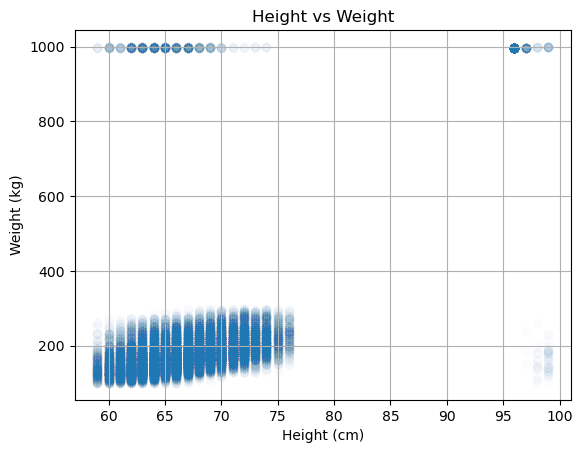

In [78]:
plt.scatter(height, weight, alpha=0.01)

plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid()
